# Librerias

In [208]:
# Librerias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import json

# PASO 1: Planteamiento del problema y Recopilación de Datos.

-PLANTEAMIENTO DEL PROBLEMA:

- Queremos un modelo que prediga los precios.


-RECOPILACION DE DATOS:

In [209]:
#Recopilar datos

data = pd.read_csv("../data/raw/AB_NYC_2019.csv")

data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


# PASO 2: Exploración y Limpieza de Datos.

- Obtener dimensiones del dataset

In [210]:
#Obtener las dimensiones

data.shape

(48895, 16)

- Obtener informacion sobre tipos de datos y valores nulos.

In [211]:
#Obtener información sobre tipo de datos y valores nulos.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

-Conclusiones:

- Dimensiones: Hay un total de 48895 pisos de AirBnB en Nueva York con 16 columnas de información cada uno.

- Valores nulos: Las variables last-review y reviews per month cuentan con 10052 valores nulos (Alrededor de un 12% de los datos totales). Las variables name y host_name tambien tienen valores nulos pero en muy menos medida.

- Tipo de datos: Hay un total de 6 variables categoricas y 10 variables numéricas.

- Eliminacion de duplicados

In [212]:
#Funcion para eliminar duplicados

#Columna identificadora del Dataset.

def EraseDuplicates(dataset, id = "id"):
    older_shape = dataset.shape
    if (dataset.drop(id, axis = 1).duplicated().sum()):
        print ("Erase duplicates...")
        dataset.drop(id, axis = 1, inplace = True)
        dataset.drop_duplicates()
    else:
        print ("No coincidences.")
        dataset.drop(id, axis=1, inplace = True)
        pass
    
    print (f"The older dimension of dataset is {older_shape}, and the new dimension is {dataset.shape}.")
    
    return dataset

EraseDuplicates(data)

data


No coincidences.
The older dimension of dataset is (48895, 16), and the new dimension is (48895, 15).


,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


- Eliminacion de datos irrelevantes.

In [213]:
#Funcion para eliminar datos irrelevantes.

irrelevant_lst = ["name","host_id","host_name","neighbourhood","latitude","longitude","last_review","calculated_host_listings_count","reviews_per_month"]

def EraseIrrelevants(dataset, lst):
    older_shape = data.shape
    print("Erase irrelevant´s dates...")
    dataset.drop(lst, axis = 1, inplace = True)
    print (f"The old dimension of dataset is {older_shape}, and the new dimension is {dataset.shape}.")
    return dataset

EraseIrrelevants(data, irrelevant_lst)

data

Erase irrelevant´s dates...
The old dimension of dataset is (48895, 15), and the new dimension is (48895, 6).


,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,availability_365
0,Brooklyn,Private room,149,1,9,365
1,Manhattan,Entire home/apt,225,1,45,355
2,Manhattan,Private room,150,3,0,365
3,Brooklyn,Entire home/apt,89,1,270,194
4,Manhattan,Entire home/apt,80,10,9,0
...,...,...,...,...,...,...
48890,Brooklyn,Private room,70,2,0,9
48891,Brooklyn,Private room,40,4,0,36
48892,Manhattan,Entire home/apt,115,10,0,27
48893,Manhattan,Shared room,55,1,0,2


-CRITERIOS DE ELIMINACION

- id: Es el identificador del dataset, no da información alguna.

- name, host_id, host_name: información totalmente irrelevante sobre el propietario del inmueble.

- neighbounrhood, latitude, longitude: información sobre la ubicación del inmueble, teniendo el campo categorico "neighbourhood_group" mucha más ordenado y trabajable estos campos son redundantes.

- number_of_reviews, last_reviews, reviews_per_month: campos con un considerable número de valores vacios, además de no considerar que sean relevantes teniendo el campo "calculated_host_listing_count" que dan una información similar pero más general.

# PASO 3: Analisis de variables univariantes

- Analisis sobre variables categóricas

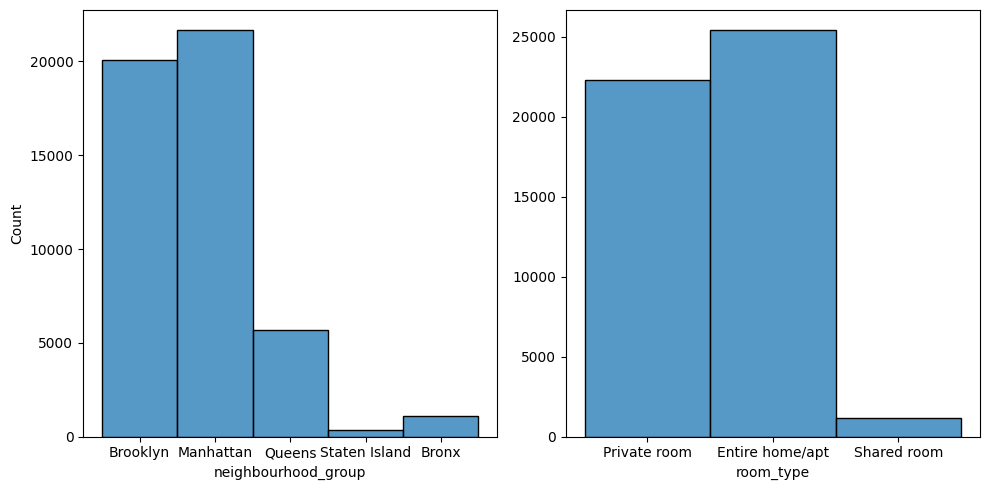

In [214]:
# Analisis sobre variables categoricas

def CategoricGraf(dataset):
    #Creamos la figura
    fig, axis = plt.subplots(1, 2, figsize=(10,5))

    #Creamos las graficas necesarias
    sns.histplot( ax = axis[0], data = dataset, x = "neighbourhood_group")
    sns.histplot( ax = axis[1], data = dataset, x = "room_type").set(ylabel=None)

    #Mostramos el grafico.
    plt.tight_layout()
    plt.show()

CategoricGraf(data)

-Conclusiones:

- Neighbourhood_group: El grueso de la muestra se concentra en Manhattan y Brooklyn respectivamente, las viviendas en Queens y el Bronx no superan el 20% del total de la muestra y las que se encuentran en Staten Island son prácticamente residuales.

- Room_type: El 90% de la muestra pertenecen a los tipo Private room y Entire home/apt room_type. Entre ellas hay una pequeña diferencia a favor de la clase Entire home.

-Availability_365: La gran mayoria de las viviendas de la muestra no tienen disponibilidad, pero también vemos una cantidad considerable de viviendas con disponibilidad elevada en el rango de 0 a 100 días. La disponibilidad aumenta progresivamente a partir de los 200 días sin bajar, siendo el segundo punto más alto de la gráfica la disponibilidad total (365 días.)

- Analisis sobre variables numéricas

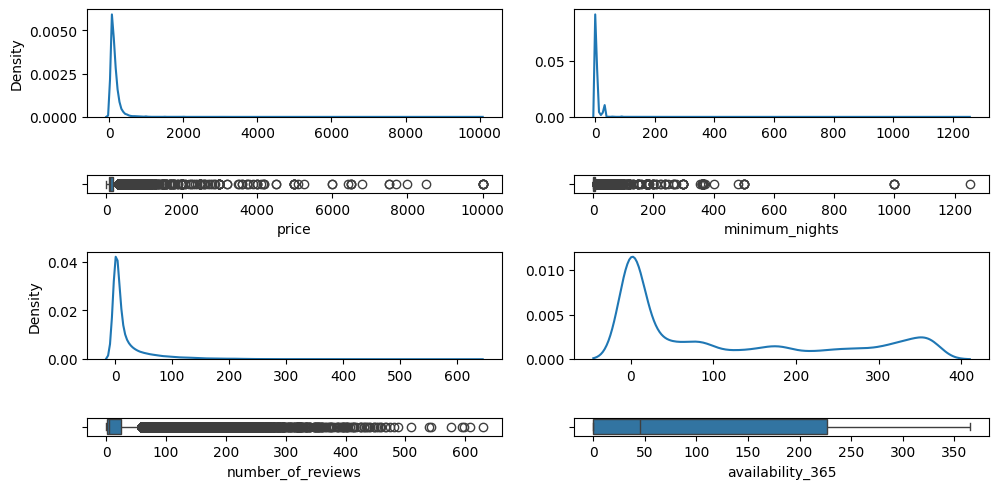

In [215]:
# Analisis sobre variables numericas

def NumericalGraf(dataset):
    #Creamos la figura
    fig, axis = plt.subplots(4, 2, figsize=(10,5), gridspec_kw={"height_ratios" : [6,1,6,1]})

    #Creamos las graficas necesarias
    sns.kdeplot( ax = axis[0,0], data = dataset, x = "price").set(xlabel=None)
    sns.boxplot( ax = axis[1,0], data = dataset, x = "price")
    sns.kdeplot( ax = axis[0,1], data = dataset, x = "minimum_nights").set(ylabel=None, xlabel=None)
    sns.boxplot( ax = axis[1,1], data = dataset, x = "minimum_nights")
    sns.kdeplot( ax = axis[2,0], data = dataset, x = "number_of_reviews").set(xlabel=None)
    sns.boxplot(ax = axis[3,0], data = dataset, x = "number_of_reviews")
    sns.kdeplot( ax = axis[2,1], data = dataset, x = "availability_365").set(ylabel=None, xlabel=None)
    sns.boxplot( ax = axis[3,1], data = dataset, x = "availability_365")
    
    plt.tight_layout()
    plt.show()

NumericalGraf(data)

    

- Analisis de variables filtrada para ver mejor los datos.

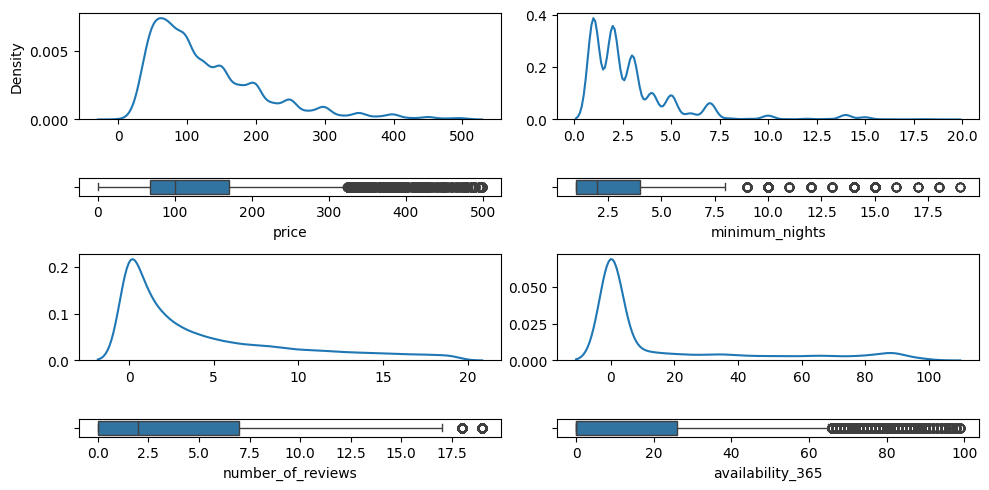

In [216]:
def FiltNumericalGraf(dataset):
    #Creamos la figura
    fig, axis = plt.subplots(4, 2, figsize=(10,5), gridspec_kw={"height_ratios" : [6,1,6,1]})

    #Creamos las graficas necesarias
    sns.kdeplot( ax = axis[0,0], data = dataset[dataset["price"] < 500], x = "price").set(xlabel=None)
    sns.boxplot( ax = axis[1,0], data = dataset[dataset["price"] < 500], x = "price")
    sns.kdeplot( ax = axis[0,1], data = dataset[dataset["minimum_nights"] < 20], x = "minimum_nights").set(ylabel=None, xlabel=None)
    sns.boxplot( ax = axis[1,1], data = dataset[dataset["minimum_nights"] < 20], x = "minimum_nights")
    sns.kdeplot( ax = axis[2,0], data = dataset[dataset["number_of_reviews"] < 20], x = "number_of_reviews").set(xlabel=None, ylabel=None)
    sns.boxplot(ax = axis[3,0], data = dataset[dataset["number_of_reviews"] < 20], x = "number_of_reviews")
    sns.kdeplot( ax = axis[2,1], data = dataset[dataset["availability_365"] < 100], x = "availability_365").set(ylabel=None, xlabel=None)
    sns.boxplot( ax = axis[3,1], data = dataset[dataset["availability_365"] < 100], x = "availability_365")
    
    plt.tight_layout()
    plt.show()

FiltNumericalGraf(data)

-Conclusiones:

- Todas las gráficas presenta una distribución asimetrica positiva muy acentuada con una cola muy larga.

# PASO 4: Analisis de variable multivariante

- Analisis Price (Minimum Nights - Number of Reviews - Availability 365) numérico/numérico

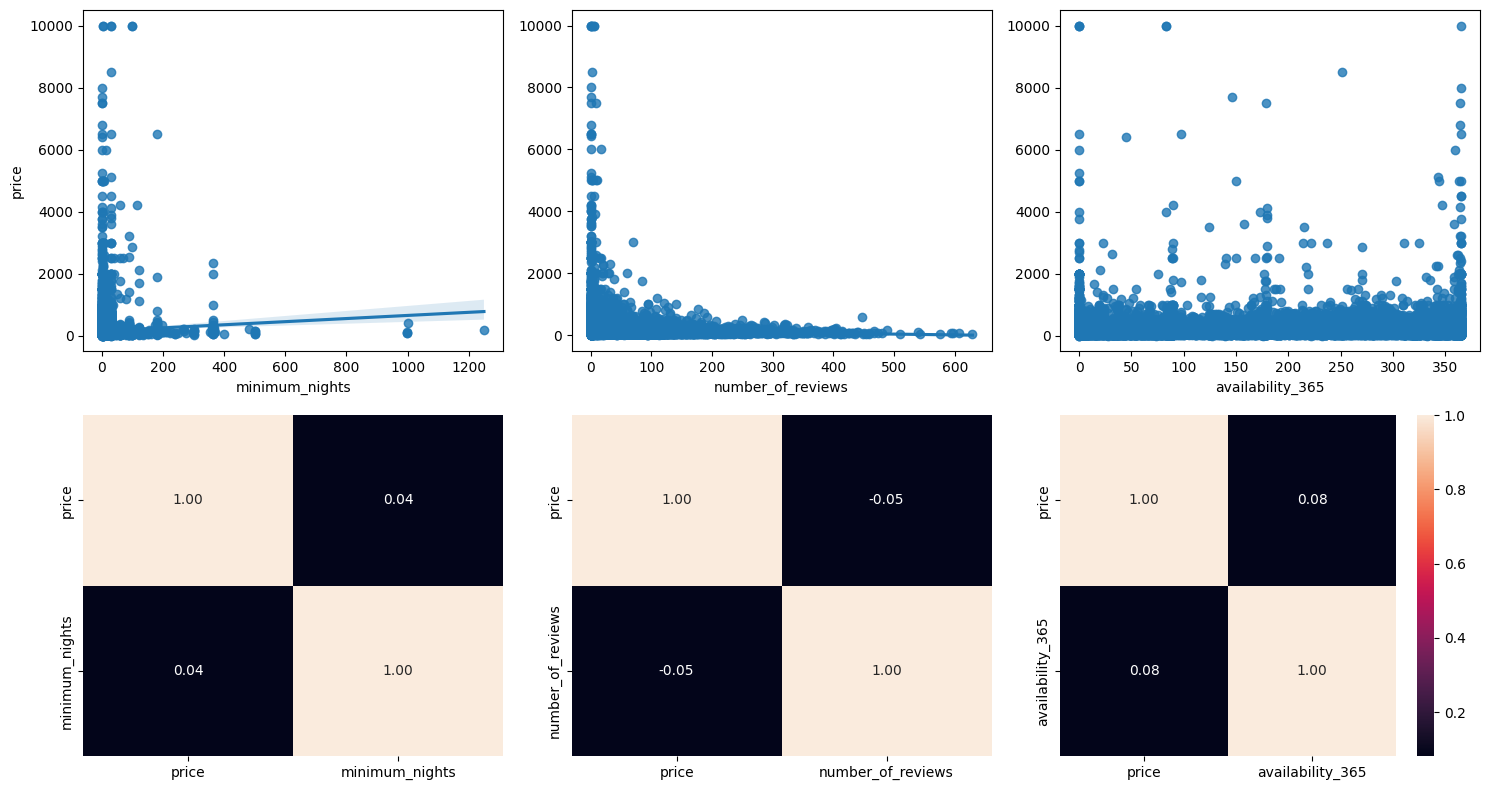

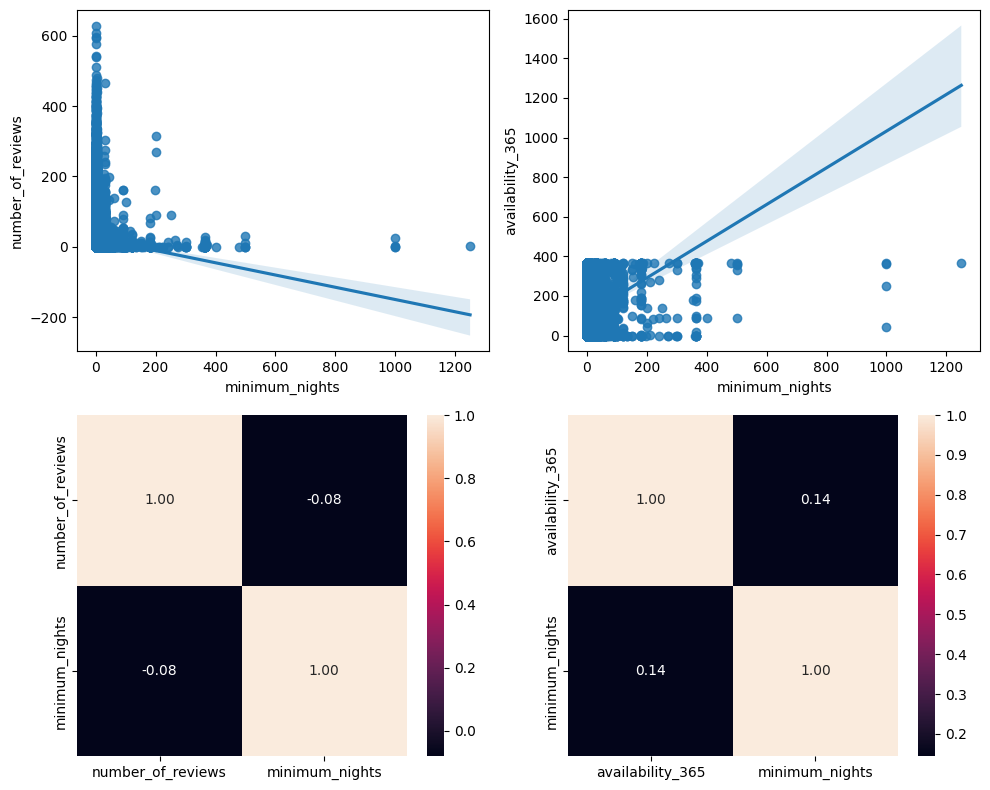

In [217]:
#Analisis numerico/numerico

def NumNumAnalysi(dataset, x, y_list):
    #Creamos la figura
    fig, axis = plt.subplots(2, 3, figsize=(15,8))

    #Creamos la grafica
    sns.regplot( ax = axis[0,0], data = dataset, x = y_list[0], y = x)
    sns.heatmap( data[[x,y_list[0]]].corr(), annot=True, fmt=".2f", ax = axis[1,0], cbar=False)
    sns.regplot( ax = axis[0,1], data = dataset, x = y_list[1], y = x).set(ylabel=None)
    sns.heatmap( data[[x,y_list[1]]].corr(), annot=True, fmt=".2f", ax = axis[1,1], cbar=False)
    sns.regplot( ax = axis[0,2], data = dataset, x = y_list[2], y = x).set(ylabel=None)
    sns.heatmap( data[[x, y_list[2]]].corr(), annot=True, fmt=".2f", ax = axis[1,2])

    plt.tight_layout()
    plt.show()

    #Creamos una segunda figura
    fig, axis = plt.subplots(2,2, figsize=(10,8))

    #Creamos la segunda grafica
    sns.regplot( ax = axis[0,0], data = dataset, x = y_list[0], y = y_list[1])
    sns.heatmap( data[[y_list[1], y_list[0]]].corr(), annot=True, fmt=".2f", ax = axis[1,0])
    sns.regplot( ax = axis[0,1], data = dataset, x = y_list[0], y = y_list[2])
    sns.heatmap( data[[y_list[2], y_list[0]]].corr(), annot=True, fmt=".2f", ax = axis[1,1])

    plt.tight_layout()
    plt.show()

NumNumAnalysi(data, "price", ["minimum_nights", "number_of_reviews","availability_365"])

-Conclusion:

- La correlación del price tanto con las minimum_nights como con las numbers_of_reviews es muy baja.

- La correlación entre el number_of_reviews y las minimum_nights tampoco tienen relación aparente.

- Aunque pequeña existe una correlación entre minimum_nights y availability_365

- Analisis Neighbourhood Group - Room Type (Categórico - Categórico)

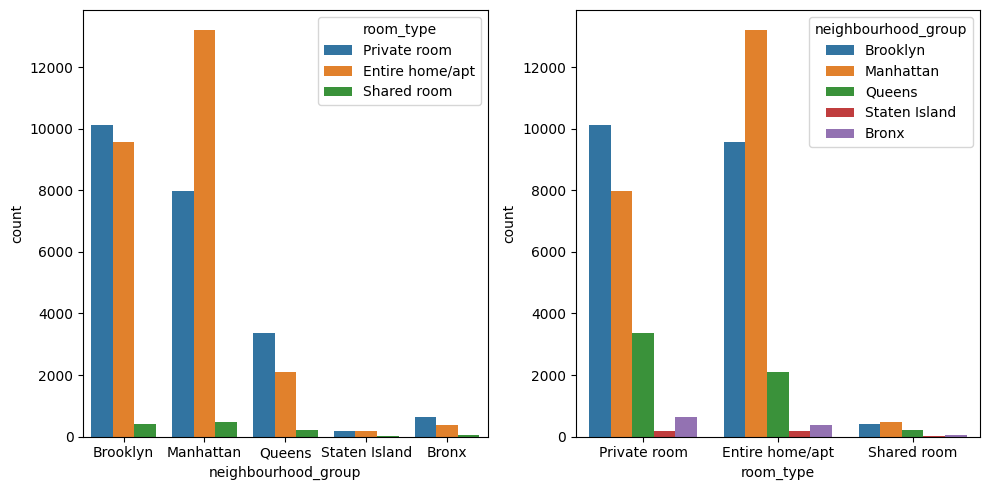

In [218]:
#Analisis categorico/categorico

def CatCatAnalysi(dataset):
    #Creamos la figura
    fig, axis = plt.subplots(1, 2, figsize=(10,5))

    #Creamos las graficas.
    sns.countplot(ax = axis[0], data = dataset, x = "neighbourhood_group", hue = "room_type")
    sns.countplot(ax = axis[1], data = dataset, x = "room_type", hue = "neighbourhood_group")

    plt.tight_layout()
    plt.show()

CatCatAnalysi(data)

-Conclusiones:

- La mayor cantidad de inmuebles son Entire/home en Manhattan.

- Brooklyn, Queens y el Bronx tienen un mayor número de private rooms. Queens es el barrio con más private rooms respecto a las demás categorias.

- One Hot Encoding

In [331]:
#Aplicamos OHE
col_name = "neighbourhood_group"

def Encoder(dataset, enc_col):
    #Creamos el codificador.
    enc = OneHotEncoder(handle_unknown="ignore")

    #Creamos el array que va a codificar
    coder = dataset[enc_col].unique().reshape(-1,1) #Necesitamos que sea una array 2x2 para pasarla por el fit
    index = list(coder.squeeze())
    #Aplicamos la codificacion
    enc.fit(coder)
    values = enc.transform(coder).toarray().squeeze().tolist()
    result = enc.transform(dataset[[enc_col]]).toarray()

    #Los guardamos en un json
    pars_dict = {}

    for i in range(len(index)):
        pars_dict.update({index[i] : values[i]})
    
    with open (f"{enc_col}.json","w") as j:
        json.dump(pars_dict, j)
    
    dataset[enc_col] = result

    return dataset


Encoder(data, col_name)

col_name = "room_type"
Encoder(data, col_name)

data

c:\Users\Fran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(
c:\Users\Fran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(


,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,availability_365
0,0.0,0.0,149,1,9,365
1,0.0,1.0,225,1,45,355
2,0.0,0.0,150,3,0,365
3,0.0,1.0,89,1,270,194
4,0.0,1.0,80,10,9,0
...,...,...,...,...,...,...
48890,0.0,0.0,70,2,0,9
48891,0.0,0.0,40,4,0,36
48892,0.0,1.0,115,10,0,27
48893,0.0,0.0,55,1,0,2


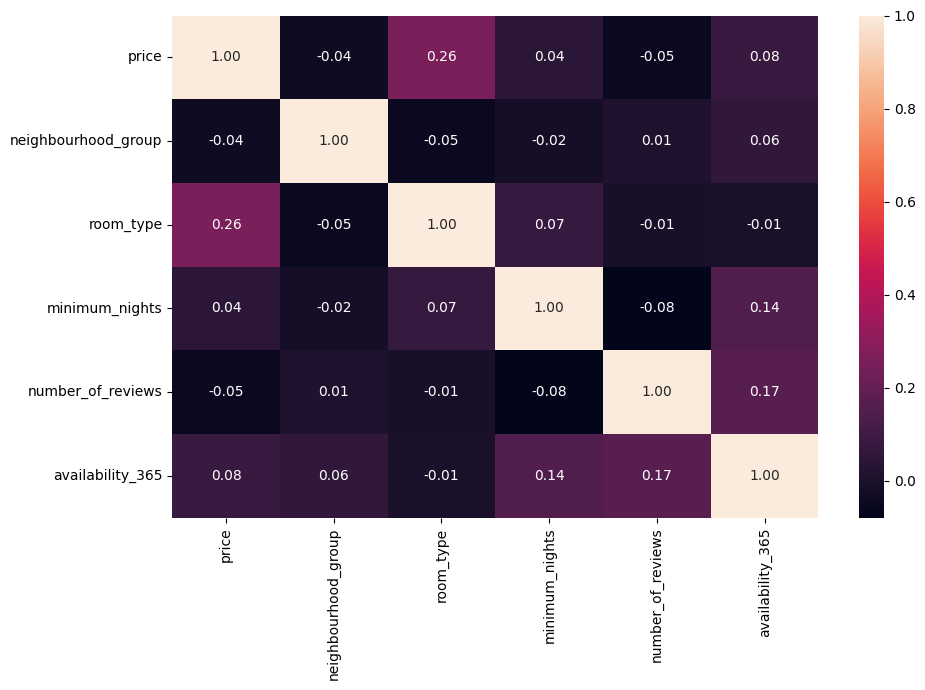

In [332]:
fig, axis = plt.subplots(figsize=(10,7))

sns.heatmap(data[["price", "neighbourhood_group","room_type","minimum_nights","number_of_reviews","availability_365"]].corr(), annot=True, fmt=".2f")

plt.tight_layout()
plt.show()


-CONCLUSIONES:

- La mayor correlación que existe es entre el precio y el tipo de habitacion.

<Axes: xlabel='price', ylabel='neighbourhood_group'>

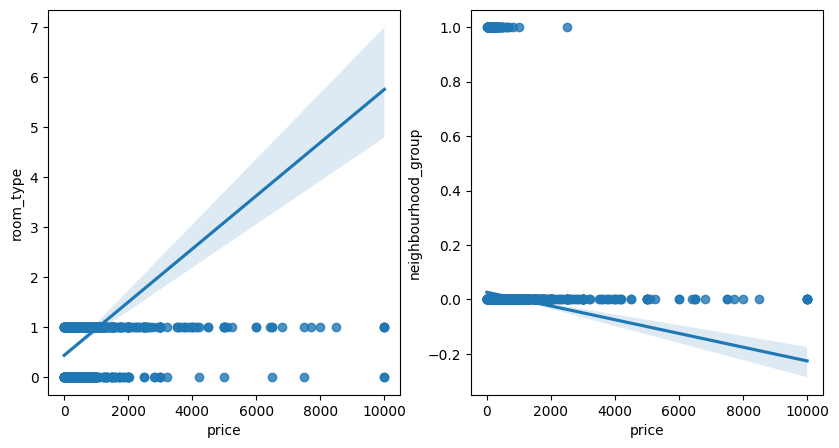

In [333]:
fig, axis = plt.subplots(1,2,figsize=(10,5))

sns.regplot(ax = axis[0], data = data, x = "price", y = "room_type")
sns.regplot(ax = axis[1], data = data, x = "price", y = "neighbourhood_group")

- Corroboramos lo anteriormente visto. El precio aumenta dependiendo de tipo de inmueble que se va a alquilar.

- También hemos comprobado el precio con el barrio y vemos que el primero baja dependiendo del segundo.

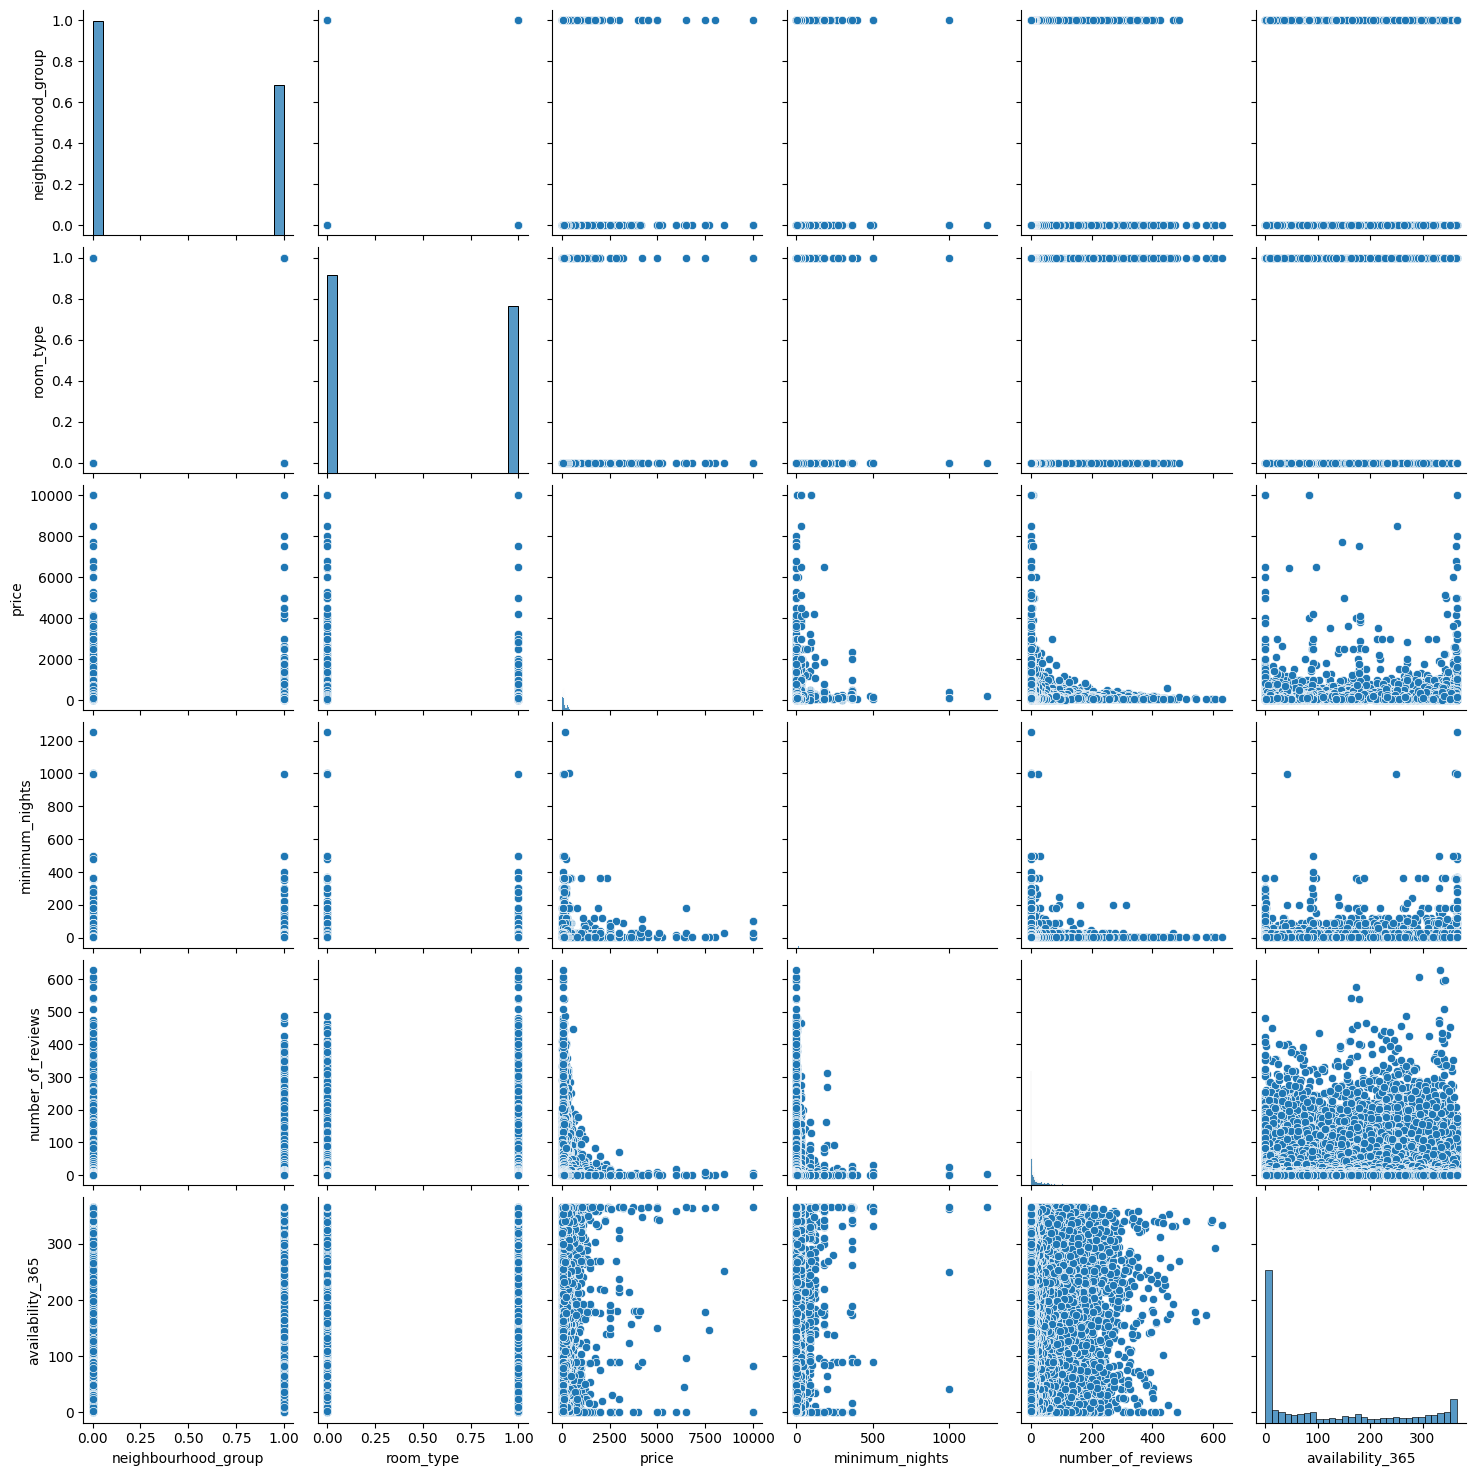

In [88]:
sns.pairplot(data=data)

# PASO 5: ingeniería de características.

- Analisis de Outliers

In [335]:
# Comprobamos las metricas de la tabla.

data.describe()

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,0.456611,0.519665,152.720687,7.029962,23.274466,112.781327
std,0.498119,0.499618,240.154170,20.510550,44.550582,131.622289
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,69.000000,1.000000,1.000000,0.000000
50%,0.000000,1.000000,106.000000,3.000000,5.000000,45.000000
75%,1.000000,1.000000,175.000000,5.000000,24.000000,227.000000
max,1.000000,1.000000,10000.000000,1250.000000,629.000000,365.000000


- Solamente viendo la tabla vemos que todos los campos menos neighbourhood group y room type tiene una gran cantidad de outliers.

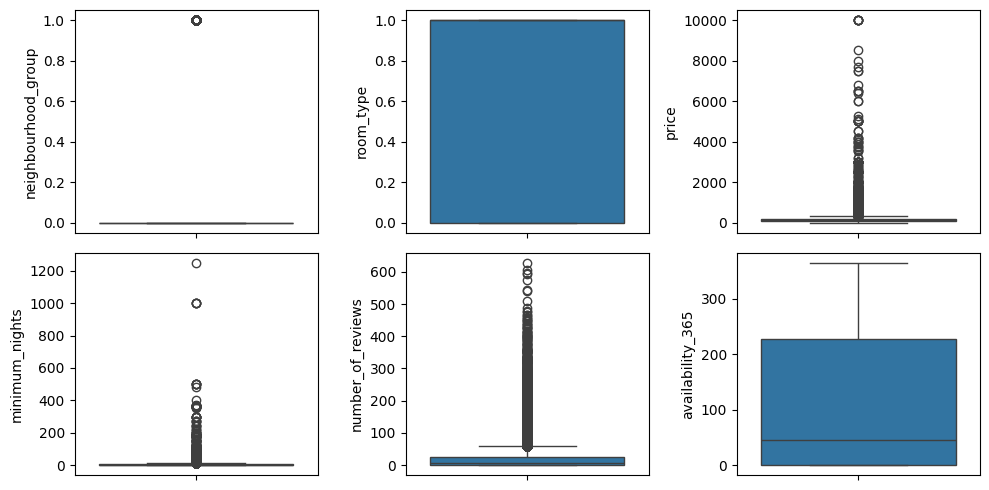

In [348]:
#Grafica de outliers

fig, axis = plt.subplots(2, 3, figsize=(10,5))

sns.boxplot( ax = axis[0,0], data = data, y = "neighbourhood_group")
sns.boxplot( ax  = axis[0,1], data = data, y = "room_type")
sns.boxplot( ax = axis [0,2], data = data, y = "price")
sns.boxplot( ax = axis[1,0], data = data, y = "minimum_nights")
sns.boxplot( ax = axis[1,1], data = data, y = "number_of_reviews")
sns.boxplot( ax = axis[1,2], data = data, y = "availability_365")

plt.tight_layout()
plt.show()

- Una vez comprobamos las graficas vemos que en efecto price, minimum nights y number of reviews tiene una gran cantidad de outliers.

- Availability_365 no tiene outliers

In [376]:
#Hacemos dos copias del dataset, una para el dataset con outliers y otra sin.

data_with_outliers = data.copy()
data_without_outliers = data.copy()

#Creamos una funcion para transformar los outliers.

def TransOutliers(dataset, col_outliers):
    stats = dataset[col_outliers].describe()
    
    #Establecemos los límites.
    # Los valores óptimos para sumarle al Q3 suelen ser 1.5*IQR, 1.75*IQR y 2*IQR.
    iqr = stats["75%"] - stats["25%"]
    upper_limit = float(stats["75%"] + (2 * iqr))
    lower_limit = float(stats["25%"] - (2 * iqr))
    
    if (lower_limit < 0):
        lower_limit = 0

    #Ajustamos el outlier por encima.
    dataset[col_outliers] = dataset[col_outliers].apply(lambda x : upper_limit if (x > upper_limit) else x)

    #Ajustamos el outlier por debajo.
    dataset[col_outliers] = dataset[col_outliers].apply(lambda x : lower_limit if (x < lower_limit) else x)

    #Guardamos los límites en un json.

    with open (f"outliers_{col_outliers}.json", "w") as j:
        json.dump({"upper_limit" : upper_limit, "lower_limit" : lower_limit}, j)

    return dataset

TransOutliers (data_without_outliers, "minimum_nights")
TransOutliers (data_without_outliers, "number_of_reviews")
TransOutliers (data_without_outliers, "availability_365")

data_without_outliers

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,availability_365
0,1.0,0.0,149,1.0,9.0,365
1,0.0,1.0,225,1.0,45.0,355
2,1.0,0.0,150,3.0,0.0,365
3,0.0,1.0,89,1.0,70.0,194
4,0.0,1.0,80,10.0,9.0,0
...,...,...,...,...,...,...
48890,1.0,0.0,70,2.0,0.0,9
48891,1.0,0.0,40,4.0,0.0,36
48892,0.0,1.0,115,10.0,0.0,27
48893,0.0,0.0,55,1.0,0.0,2
